In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import math as m
import matplotlib.pyplot as plt    # to visualize data and draw plots
import numpy as np
import seaborn as sns

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-0a_d_mex because the default path (/home/cse479/rbockmon2/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(images, labels), (temp, temp1) = fashion_mnist.load_data()

# Major changes here: I partitioned 50,000 images to be train and 10,000 images to be validation.
# This caused the results to be significantly different for some models. 
# I will make changes to the report as needed.
train_images, validation_images= images[50000:] / 255.0, images[:10000] / 255.0  
train_labels, validation_labels= labels[50000:], labels[:10000]

classes=[0,1,2,3,4,5,6,7,8,9] # To make heat map

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
invertedTriangle = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    
    keras.layers.Dense(300, activation="relu"), 
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(10, activation="softmax"),
    ])

rectangle = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    
    keras.layers.Dense(200, activation="relu"),    
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(10, activation="softmax"),
    ])

hexagon = tf.keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    
    keras.layers.Dense(175, activation="relu"),    
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(175, activation="relu"),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(10, activation="softmax"),
    ])

In [4]:
model = invertedTriangle # Change based on the model you want to test
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "adam", metrics = ["accuracy"])

history = model.fit(train_images, train_labels, batch_size = 32, epochs=100, 
          validation_data=(validation_images, validation_labels), use_multiprocessing=(True))


Epoch 1/100
313/313 [==============================] - 2s 7ms/step - loss: 1.3539 - accuracy: 0.5036 - val_loss: 0.7138 - val_accuracy: 0.7408
Epoch 2/100
313/313 [==============================] - 2s 6ms/step - loss: 0.8085 - accuracy: 0.7060 - val_loss: 0.5849 - val_accuracy: 0.7818
Epoch 3/100
313/313 [==============================] - 2s 6ms/step - loss: 0.7119 - accuracy: 0.7409 - val_loss: 0.5686 - val_accuracy: 0.7668
Epoch 4/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6474 - accuracy: 0.7620 - val_loss: 0.5375 - val_accuracy: 0.8015
Epoch 5/100
313/313 [==============================] - 2s 6ms/step - loss: 0.6310 - accuracy: 0.7727 - val_loss: 0.4989 - val_accuracy: 0.8240
Epoch 6/100
313/313 [==============================] - 2s 6ms/step - loss: 0.5947 - accuracy: 0.7859 - val_loss: 0.4740 - val_accuracy: 0.8247
Epoch 7/100
313/313 [==============================] - 2s 6ms/step - loss: 0.5700 - accuracy: 0.7994 - val_loss: 0.4836 - val_accuracy: 0.8142

313/313 [==============================] - 1s 3ms/step - loss: 0.4706 - accuracy: 0.8688


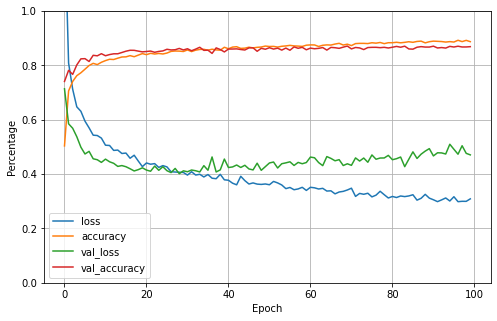

In [5]:
# Evaluates model on validation data and graph it
evaluation = model.evaluate(validation_images, validation_labels) # Stores [loss, accuracy] of model
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.xlabel("Epoch")
plt.ylabel("Percentage")
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [6]:
# Create confidence interval for error rate on validation data
error_test_data = 0
y_pred=model.predict_classes(validation_images)   # Make prediction
for length in range(len(y_pred)):                 # For loop that counts how many correct predictions
    if y_pred[length] == validation_labels[length]:   
        error_test_data +=  1/len(validation_labels)

        error_test_data = 1 - error_test_data     # 1 - correct predictions to get rate of wrong predictions

# Make upper and lower bound of error on test data assuming error follows a normal distribution
upperbound_gen_error = error_test_data + 1.96*(m.sqrt(((error_test_data)*(1 - error_test_data))/len(validation_labels)))  
lowerbound_gen_error = error_test_data - 1.96*(m.sqrt(((error_test_data)*(1 - error_test_data))/len(validation_labels)))
print("Based on using normal distribution as the estimator, the 95% confidence interval for error hypothesis: [", lowerbound_gen_error, ",", upperbound_gen_error, "]")


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Based on using normal distribution as the estimator, the 95% confidence interval for error hypothesis: [ 0.0 , 0.0 ]


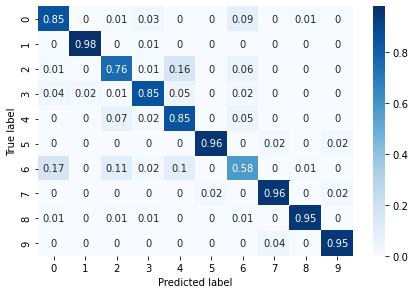

In [7]:
# Making the confusion matrix based on the website: https://androidkt.com/keras-confusion-matrix-in-tensorboard/
# Feel free to check the website to make any changes to the code. We need to change this since it's exact copy
con_Matrix = tf.math.confusion_matrix(labels=validation_labels, predictions=y_pred).numpy()

con_Matrix_norm = np.around(con_Matrix.astype('float') / con_Matrix.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_Matrix_norm,
                     index = classes, 
                     columns = classes)
#plots the heat map of the con matrix
figure = plt.figure()
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()